# 이변량_범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|변수|설명|값 설명|
|----|----|----|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## 2.시각화
titanic data에서 Age를 Y로 두고 비교해 봅시다.

### (1) 평균 비교 : barplot

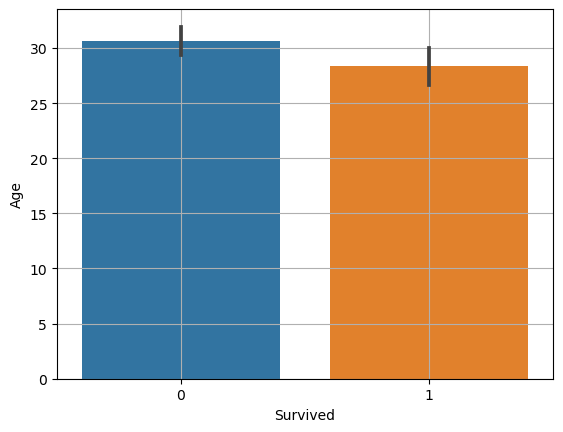

In [4]:
sns.barplot(x = "Survived", y = "Age", data=titanic)
plt.grid()
plt.show()

In [5]:
titanic.loc[:10, ['Survived','Age']]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


위 두 범주간에 평균에 차이가 있나요?

### (2) (추가) boxplot

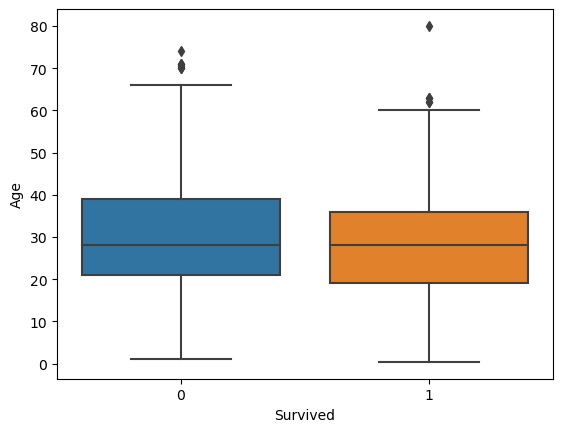

In [6]:
sns.boxplot(x = 'Survived', y = 'Age', data = titanic)
plt.show()

## 3.수치화

### (1) t-test

두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.

* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.

* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


#### 1) 데이터 준비

In [7]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]

In [9]:
# 두 그룹으로 데이터 저장
died = temp.loc[temp['Survived'] == 0, 'Age']
survived = temp.loc[temp['Survived'] == 1, 'Age']

#### 2) t-test

In [10]:
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 성별에 따라 운임에 차이가 있을 것이다.

In [11]:
#Sex --> Fare

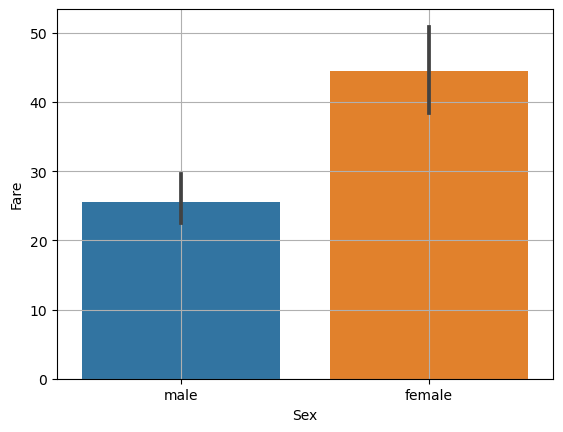

In [12]:
sns.barplot(x = "Sex", y = "Fare", data = titanic)
plt.grid()
plt.show()

In [14]:
#시각화, T-test

In [15]:
male = titanic.loc[titanic["Sex"] == "male", "Fare"]
female = titanic.loc[titanic["Sex"] == "female", "Fare"]

In [16]:
spst.ttest_ind(male, female) #변수를 바꿔서 적으면 부호만 다르고 pvalue는 같다

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

* [문2] 생존여부에 따라 운임에 차이가 있을 것이다.

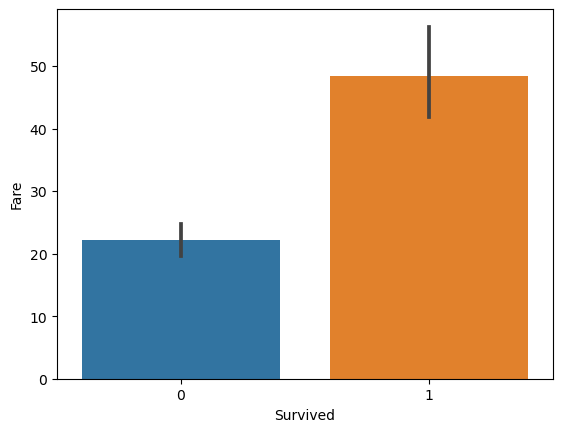

In [17]:
sns.barplot(x = "Survived", y = "Fare", data = titanic)
plt.show()

In [18]:
died = titanic.loc[titanic["Survived"] == 0, "Fare"]
survived = titanic.loc[titanic["Survived"] == 1, "Fare"]

In [19]:
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15)

### (2) anova


* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

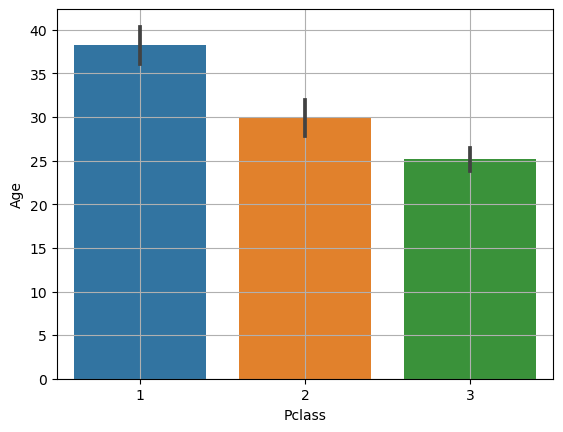

In [23]:
# Pclass(3 범주) --> Age
sns.barplot(x = "Pclass", y = "Age", data = titanic)
plt.grid()
plt.show()

#### 1) 데이터 준비

In [29]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

#### 2) anova

In [30]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 승선지역(Embarked)별로 운임에 차이가 있을 것이다. 
    * 시각화와 수치화로 확인해 봅시다.

In [33]:
#Embarked --> Fare
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

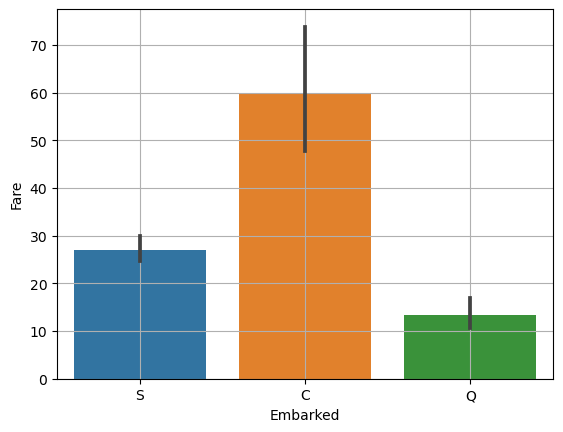

In [40]:
sns.barplot(x = "Embarked", y = "Fare", data = titanic)
plt.grid()
plt.show()

In [41]:
temp = titanic.loc[titanic["Embarked"].notnull()]
p1 = temp.loc[temp["Embarked"] == "S", "Fare"]
p2 = temp.loc[temp["Embarked"] == "C", "Fare"]
p3 = temp.loc[temp["Embarked"] == "Q", "Fare"]
spst.f_oneway(p1, p2, p3)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

In [35]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

* [문2] 객실등급(Pclass)별로 운임에 차이가 있을 것이다. 
    * 시각화와 수치화로 확인해 봅시다.

## 4.복습문제

air quality 데이터셋으로 다음 문제를 풀어 봅시다.

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터불러오기

In [2]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air['Weekend'] = np.where(air['Weekday'] >=5, 1, 0)
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday,Weekend
0,41,190.0,7.4,67,1973-05-01,5,1,0
1,36,118.0,8.0,72,1973-05-02,5,2,0
2,12,149.0,12.6,74,1973-05-03,5,3,0
3,18,313.0,11.5,62,1973-05-04,5,4,0
4,19,NaN,14.3,56,1973-05-05,5,5,1


* 1) 주말여부(Weekend) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

In [4]:
air.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Date       0
Month      0
Weekday    0
Weekend    0
dtype: int64

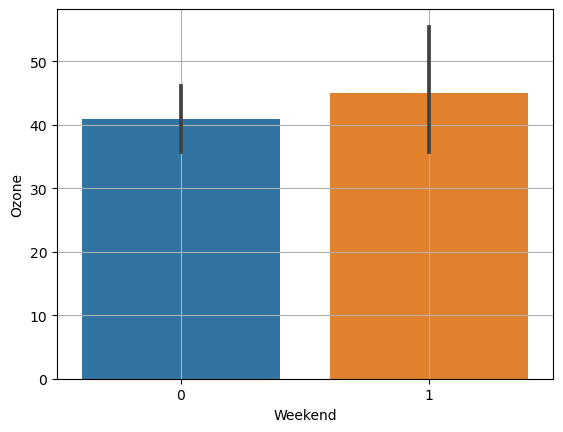

In [6]:
sns.barplot(x = "Weekend", y = "Ozone", data = air)
plt.grid()
plt.show()

In [7]:
a = air.loc[air["Weekend"] == 0, "Ozone"]
b = air.loc[air["Weekend"] == 1, "Ozone"]
spst.ttest_ind(a, b)

Ttest_indResult(statistic=-0.7671489829911908, pvalue=0.4441907648291733)

* 2) 요일(Weekday) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

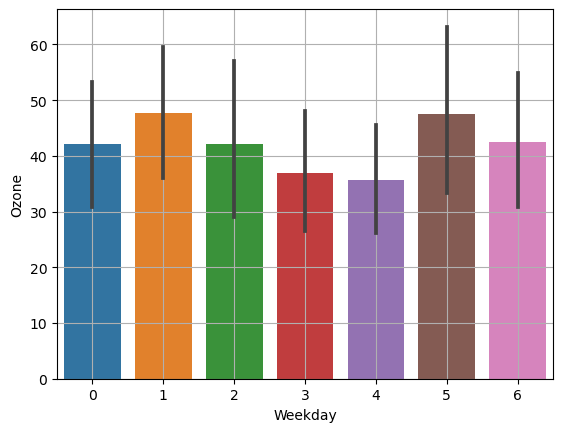

In [8]:
sns.barplot(x = "Weekday", y = "Ozone", data = air)
plt.grid()
plt.show()

In [9]:
a = air.loc[air["Weekday"] == 0, "Ozone"]
b = air.loc[air["Weekday"] == 1, "Ozone"]
c = air.loc[air["Weekday"] == 2, "Ozone"]
d = air.loc[air["Weekday"] == 3, "Ozone"]
e = air.loc[air["Weekday"] == 4, "Ozone"]
f = air.loc[air["Weekday"] == 5, "Ozone"]
g = air.loc[air["Weekday"] == 6, "Ozone"]
spst.f_oneway(a, b, c, d, e, f, g)

F_onewayResult(statistic=0.5098923426664418, pvalue=0.8001433644111904)

* 3) 월(Month) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

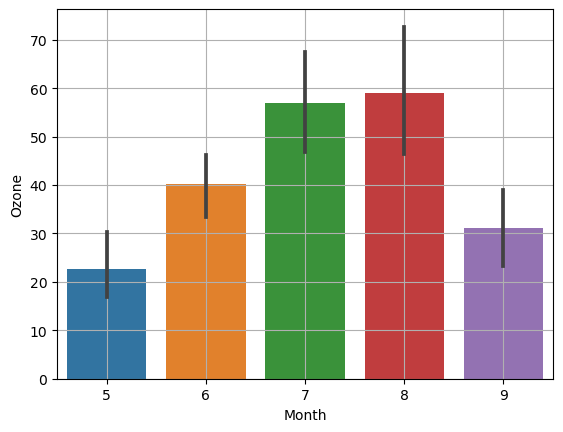

In [10]:
sns.barplot(x = "Month", y = "Ozone", data = air)
plt.grid()
plt.show()

In [12]:
a = air.loc[air["Month"] == 5, "Ozone"]
b = air.loc[air["Month"] == 6, "Ozone"]
c = air.loc[air["Month"] == 7, "Ozone"]
d = air.loc[air["Month"] == 8, "Ozone"]
e = air.loc[air["Month"] == 9, "Ozone"]
spst.f_oneway(a, b, c, d, e)

F_onewayResult(statistic=10.702965130677123, pvalue=1.2027079954529325e-07)